<a href="https://colab.research.google.com/github/rajeshmore1/Capstone-Project-1/blob/main/Rajesh_More_Copy_of_Team_4_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Examining The Data
First thing we have to do is understand the context of the problem and 'examination of data'.

*   **Data is New Oil:**
Airbnb, Inc. is an American vacation rental online marketplace company based in San Francisco, California, United States. Airbnb offers arrangement for lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.
The company is having huge data of guests and hosts(Guesthouse/Hotel owners) of New York City.This data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
Before we deep dive into analysis of data we have to look into how data is arranged.So lets check the oil.


*   **Basic Examination:**
we are having dataframe which contains 48895 rows and 16 coulmns.This gives us some insights about how much deeper the sea is.Datatypes of Various columns are integer,float and objects.There are some outliers and null values also, in various rows.It increases our work as we have to drop these values.











In [ ]:
#Import package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ast import literal_eval

In [ ]:
## This will gather necessary libraries for plotting.
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from matplotlib import style 
import datetime as dt
style.use("ggplot")

In [ ]:
#Import CSV file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# It is time to grab the data
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Day 1/Copy of AB_NYC_2019.csv'
df = pd.read_csv(working_directory)

In [ ]:
## lets look at their shapes respectively.
print(" Shape of the resources dataframe is: " , df.shape)

 Shape of the resources dataframe is:  (48895, 16)


In [ ]:
# Lets look at he first 15 rows for each dataframe to explore column names, indexes better.
df.head(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
#To get the column names of our dataframes :

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#To get the data type of each column of a dataframe:

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
#To understands the statistics of columns that have numeric data types.

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# More About Hosts And Properties:
1. Data posses the information about 11452 different hosts who rented their property in New York City.They are located at different locations in the city itslef.
2. There are 47906 unique properties listed by airbnb which belongs to 11452 different hosts. Top 5 hosts having largest number of properties include -Michael      -    417
David         -   403
Sonder (NYC)  -   327
John          -   294 and
Alex          -   279
3. All properties are located within five neighbourhood groups in New York City. i.e 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'.
4. There are three types of options available for guests to stay-Entire home or apartment, Private room,Shared room. Availability of each segment is as follows.
*   Entire home/apt   - 25409
*   Private room      -22326
*   Shared room       -  1160
4. Most Famous Property in terms of total number of reviews is 'Room near JFK Queen Bed' owned by Dona, situated at Queens Neighborhood group.Runner ups are- Great Bedroom in Manhatten and Beautiful Bedroom in Manhattan.
5.  Maximum number of properties located in ings are in Williamsburg neighbourhood in Brooklyn neighbourhood group.
6.  Minimum number of properties located in Willowbrook-1,New Dorp-1,Richmondtown-1,Rossville-1.(One in each neighbourhood)




In [ ]:
df["host_name"].nunique()

11452

In [ ]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
len(df.neighbourhood.unique())

221

In [ ]:
#Maximum and Minimum number of properties located in:
df['neighbourhood'].value_counts()

Williamsburg          3802
Bedford-Stuyvesant    3662
Harlem                2608
Bushwick              2452
Upper West Side       1850
                      ... 
Lighthouse Hill          2
Willowbrook              1
New Dorp                 1
Richmondtown             1
Rossville                1
Name: neighbourhood, Length: 219, dtype: int64

In [ ]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df.dropna(subset = ['name'])
len(df.name.unique())

47906

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.dropna(subset = ['host_name'])
top_hosts= df['host_name'].value_counts().head(10)
top_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

In [ ]:

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [ ]:
top_host_df=pd.DataFrame(top_hosts)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_name', 'host_name':'property_count'}, inplace=True)
top_host_df

,host_name,property_count
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


[Text(0, 0, 'Michael'),
 Text(0, 0, 'David'),
 Text(0, 0, 'Sonder (NYC)'),
 Text(0, 0, 'John'),
 Text(0, 0, 'Alex'),
 Text(0, 0, 'Blueground'),
 Text(0, 0, 'Sarah'),
 Text(0, 0, 'Daniel'),
 Text(0, 0, 'Jessica'),
 Text(0, 0, 'Maria')]

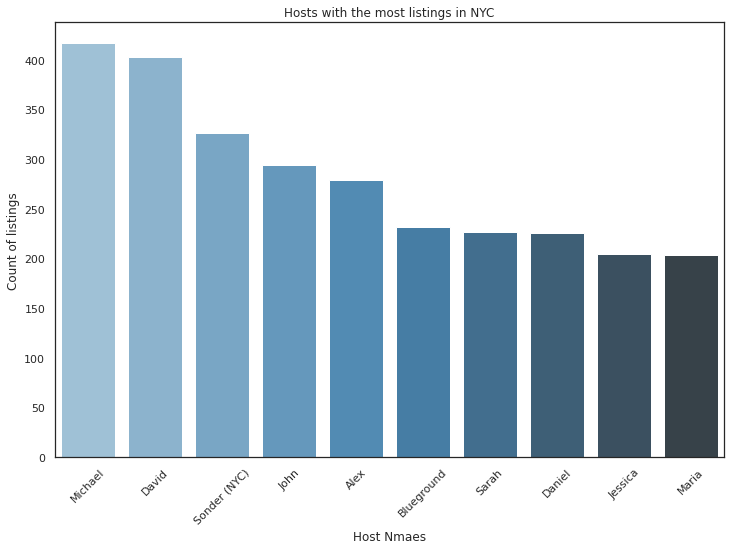

In [ ]:
viz_1=sns.barplot(x="host_name", y="property_count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host Nmaes')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Most Famous Property in terms of total number of reviews is 'Room near JFK Queen Bed' situated at Queens Neighborhood group.Runner ups are- Great Bedroom in Manhatten.and Beautiful Bedroom in Manhattan

In [ ]:
#Most Famous Properties in terms of reviews in NYC
top_reviewed_hosts= df.nlargest(10,'number_of_reviews').head(5)
top_reviewed_hosts

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


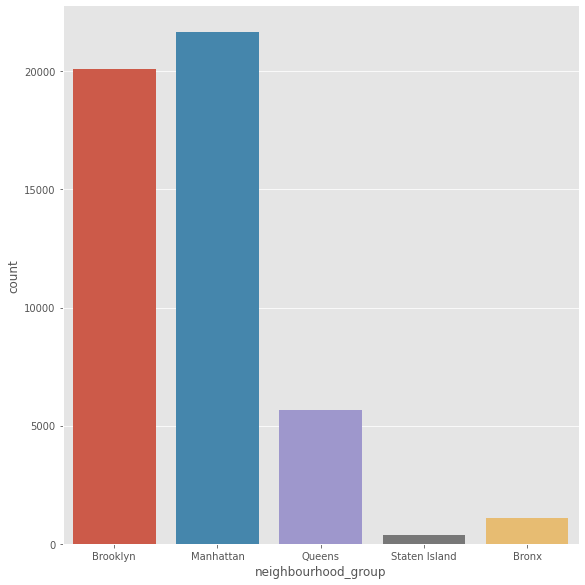

In [ ]:
sns.catplot("neighbourhood_group", data=df, kind="count", height=8)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


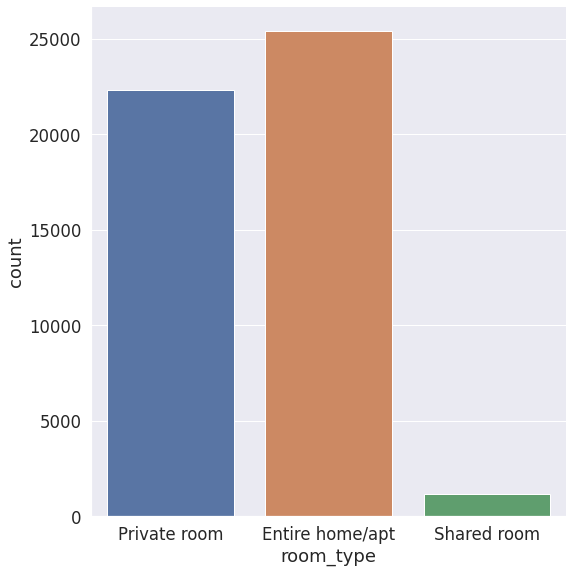

In [ ]:
sns.set(font_scale=1.5)
sns.catplot("room_type", data=df, kind="count", height=8)

In [ ]:
data = df.neighbourhood.value_counts()[:10]
data

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<BarContainer object of 10 artists>

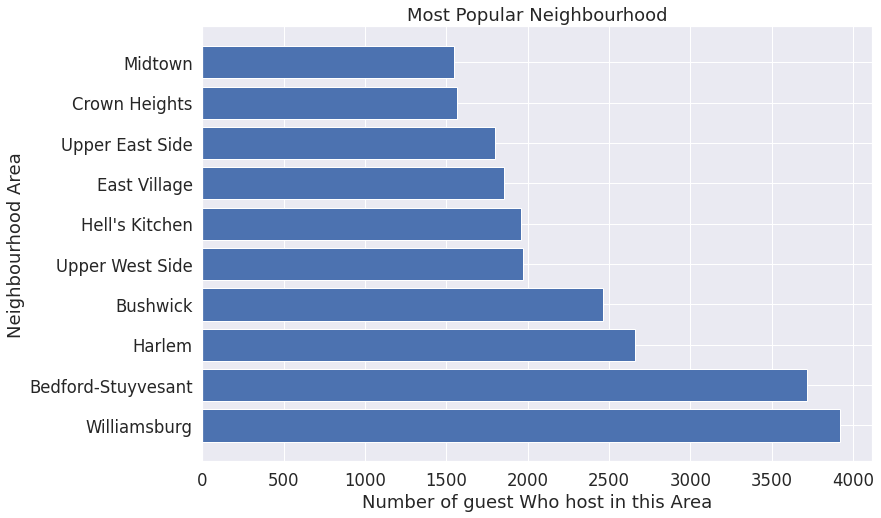

In [ ]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

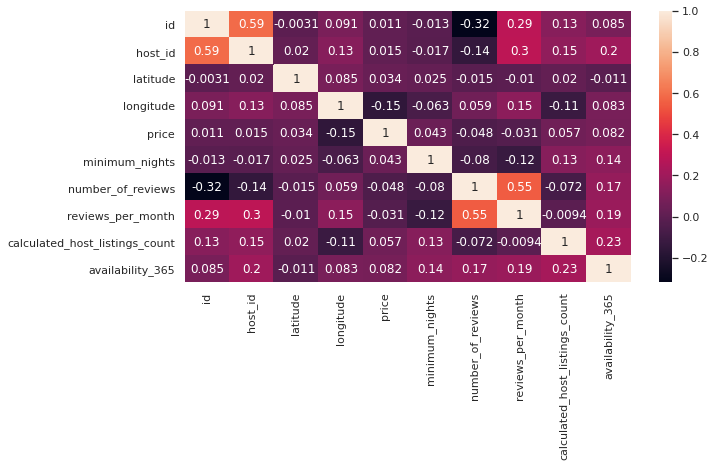

In [ ]:
# correlation matrix
sns.set(font_scale=1)
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

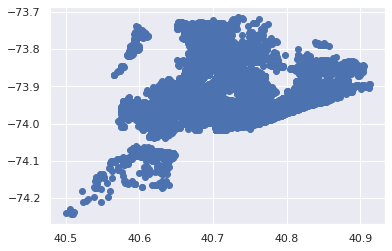

In [ ]:
x=df['latitude']
y=df['longitude']
plt.scatter(x,y)

In [ ]:
top_type_of_room= df['room_type'].value_counts().head(10)
top_type_of_room

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
top_host1=df.host_id.value_counts().head(10)
top_host1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 365.0)

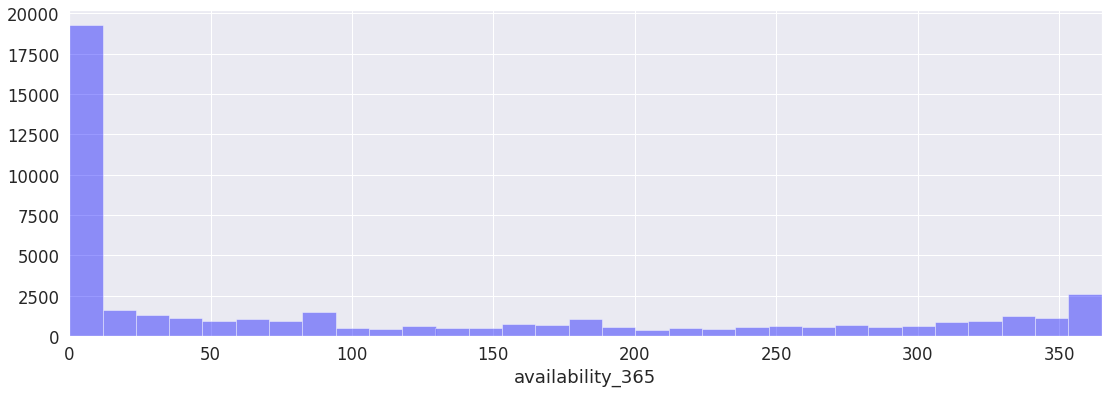

In [ ]:
#There are some outliers in availability_365 columns
fig, axes = plt.subplots(1,1,figsize=(18.5, 6))
sns.distplot(df['availability_365'], rug=False, kde=False, color="blue", ax=axes)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


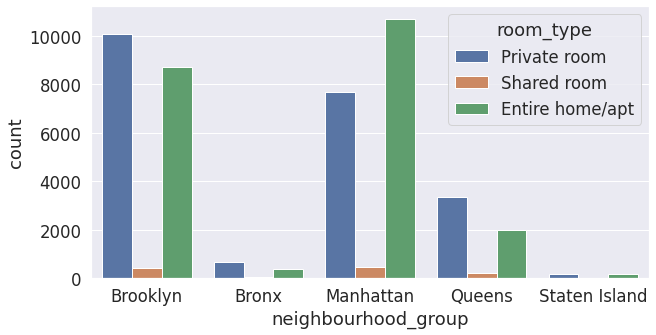

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['neighbourhood_group'],hue=df['room_type'])

# Searching The Busiest Host:
We have to do lot of brainstorming here to find out the busiest host.The first question comes in my mind is How we are going define word 'business'? Should we consider Host with large number of properties is busy, Going by this logic, we will get **Michael** as the busiest host. But if we consider other parameters like total reviews or reviews per month we can get different answers.


*   If we consider total reviews to find the busiest host, Most busiest host becomes **Dona** and the name her property is 'Room near JFK Queen Bed'.She is having 629 total reviews. But there is one propblem in this approach, what if Dona's hotel is oldest one she will be having more Total Reviews tahn newly listed property. To overcome this problem we shall take monthly reviews.
*   Here comes the another compititr to our previous winner 'Dona'. If we consider the reviews per month instead of total reviews the clearcut winner here is **Row NYC** and his property named- 'Enjoy great views of the City in our Deluxe Room!'

**You might be thinking as why Row NYC, Louann, Nalicia are the busiest hosts ?**
For that, lets do some scrutiny and play with corresponding rows and columns. 

*   We will find out that prices of these host's properties are relativeley cheaper(Its below IQR value) than 75% of the listed properties in NYC.
*   They offer most demanding property type i.e. Private room. 
*   Some hotels have minimun stay policy as greater than one night stay. But busiest guest allow minimum one night stay to guests. We can take example here, like, if my requirement of stay is only one day, I should not go for properties having minimum stay policy grater than one day. So It will become my natural choice to find out such hotels which allow me stay for minimum duration.






In [ ]:
#Dilemma: 'Zero' Vs 'median values' in place of null values in reviews per month column. will let 'zero' tweo win this match.
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [ ]:
top_host1=df.host_id.value_counts().head(10)
top_host1

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
top_reviewed_hosts= df.nlargest(10,'number_of_reviews').head(10)
top_reviewed_hosts

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [ ]:
top_review_per_month_hosts= df.nlargest(10,'reviews_per_month')
top_review_per_month_hosts

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25
29628,22750161,JFK 3 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66298,-73.77000,Private room,50,1,302,2019-07-06,16.81,3,26
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
36238,28826608,“For Heaven Cakes”,217379941,Brent,Queens,Springfield Gardens,40.66457,-73.76918,Entire home/apt,75,1,132,2019-07-05,15.78,1,28
40297,31249784,Studio Apartment 6 minutes from JFK Airport,232251881,Lakshmee,Queens,Jamaica,40.66793,-73.78452,Private room,67,1,95,2019-07-05,15.32,8,145


# Central Tendancies


*   **Price predictions**
1. We can see that the average price is 152. Price varies between 0   and $10000. 

2.  Price column is positively skewed. We are going to remove properties which are having more than $300 rent.

3.  We see that the average price is 150. Price varies between 0 to 299.

4.  Removed outliers which are greater than $300 price.

5.  There are only 11 rows having zero values in price column.

6.  Properties located at Manhatten are are having maximum average rent followed by Brooklyn and State Island.

7. Properties located at Willowbrook neighbourhood are having maximum average rent followed by Neponsit,	Breezy Point,	NoHo, and	Tribeca.

8.  Properties located at Bull's Head neighbourhood are having minimum averrage rent having $47.33, followed by Hunts Point and Tremont.

9. The cheapest property is Gigantic Sunny Room in Park Slope-Private Backyard located in Brooklyn neighbourhood group and the rent is $10.Along with there are many options available with similar price e.g. Very Spacious bedroom, steps from CENTRAL PARK(Manhatten)








In [ ]:
pricedf.isnull().sum()

0

In [ ]:
df4=df.loc[df['price'] == 0]
df4.shape


(11, 16)

In [ ]:
pricedf= df['price']
pricedf

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 44977, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


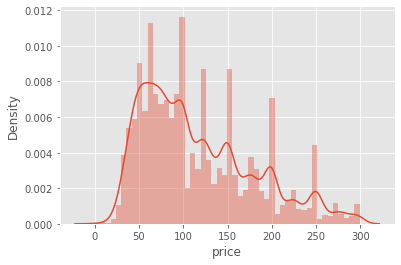

In [ ]:
sns.distplot(df['price'], hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


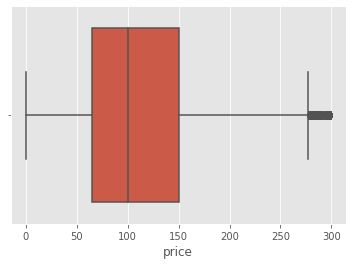

In [ ]:
ax = sns.boxplot(pricedf)

In [ ]:
df["price"].describe()

count    44977.000000
mean       116.017520
std         63.095803
min          0.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        299.000000
Name: price, dtype: float64

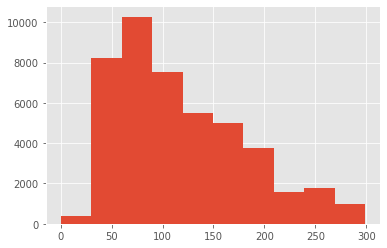

In [ ]:
### We see a more Gaussian distribution here
hist_price2=df["price"][df["price"]<300].hist()


In [ ]:
#We use 300 as threshold price 
df=df[df["price"]<300]

In [ ]:
### Looking at the price column again
df["price"].describe()

count    44977.000000
mean       116.017520
std         63.095803
min          0.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        299.000000
Name: price, dtype: float64

In [ ]:
### Lets see the average listing price by neighbourhood group
ng_price=pd.DataFrame(df.groupby("neighbourhood_group")["price"].mean())
ng_price= ng_price.reset_index()
ng_price.set_index("neighbourhood_group", inplace = True)
ng_price

,price
neighbourhood_group,
Bronx,75.858890
Brooklyn,103.345214
Manhattan,140.092000
Queens,87.649684
Staten Island,87.488950


In [ ]:
neighbourhood_price=pd.DataFrame(df.groupby("neighbourhood")["price"].mean())
neighbourhood_price= neighbourhood_price.reset_index()
#neighbourhood_price= neighbourhood_price.set_index("neighbourhood", inplace = True)

neighbourhood_price.sort_values(["price"], axis=0, 
                 ascending=False, inplace=True) 
neighbourhood_price_highest= neighbourhood_price.head(5)
neighbourhood_price_highest


,neighbourhood,price
214,Willowbrook,249.000000
138,Neponsit,237.000000
21,Breezy Point,213.333333
143,NoHo,196.666667
196,Tribeca,195.153846


In [ ]:
neighbourhood_price_lowest= neighbourhood_price.tail(5)
neighbourhood_price_lowest

,neighbourhood,price
50,Corona,54.412698
178,Soundview,53.466667
195,Tremont,51.545455
101,Hunts Point,50.500000
27,Bull's Head,47.333333


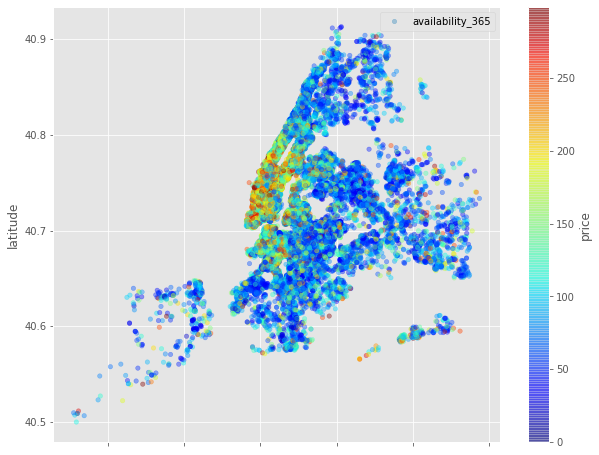

In [ ]:
#let's see how scatterplot will come out 
viz_4= df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [ ]:
cheapest_hotel_df= df[['name','price']]
#cheapest_hotel_df.head(15)
cheapest_hotel_df = cheapest_hotel_df.dropna(how='all', axis=0)
cheapest_hotel_df.head(15)


,name,price
25795,Contemporary bedroom in brownstone with nice view,0
26866,Best Coliving space ever! Shared room.,0
25794,Spacious comfortable master bedroom with nice ...,0
25796,Cozy yet spacious private brownstone bedroom,0
23161,"Huge Brooklyn Brownstone Living, Close to it all.",0
25753,"Sunny, Quiet Room in Greenpoint",0
25433,★Hostel Style Room | Ideal Traveling Buddies★,0
25778,Modern apartment in the heart of Williamsburg,0
26259,the best you can find,0
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",0


In [ ]:
#we reomved properties having more than $300 price as outliers
most_expensive_property= cheapest_hotel_df.tail(15)
most_expensive_property

,name,price
41843,Eldridge Refined,299
38975,⭐SPRING/SUMMER SALE- LARGE OUTDOOR PATIO⭐,299
18084,Gorgeous Sunset-facing Carroll Gardens 1 Bedroom,299
46692,Extremely Large 2 Bedroom Midtown Apartment,299
9886,Modern CottageStyle EarlyBirdDiscount! TimeSquare,299
38490,Beautiful Central 2 Bedroom in Soho!,299
902,"Awesome views, Central location",299
43360,Your Next Vacation Should be Here...Walk to Ti...,299
33525,Family suites in UpperEastSide Townhouse,299
42552,Private hotel room in the heart of Times Square,299


# Feature Engineering

In [ ]:
feature_columns=['neighbourhood_group','room_type','price','minimum_nights','availability_365']
required_df=df[feature_columns]
required_df.head(15)

,neighbourhood_group,room_type,price,minimum_nights,availability_365
25795,Brooklyn,Private room,0,1,232
26866,Brooklyn,Shared room,0,30,139
25794,Brooklyn,Private room,0,1,176
25796,Brooklyn,Private room,0,1,222
23161,Brooklyn,Private room,0,4,28
25753,Brooklyn,Private room,0,2,0
25433,Bronx,Private room,0,2,127
25778,Brooklyn,Entire home/apt,0,5,73
26259,Manhattan,Entire home/apt,0,3,0
25634,Brooklyn,Private room,0,2,0
